# Title: Liver Disease Prediction

### Project Aim:
The aim of this project is to develop a machine learning model to predict liver disease based on patient data. The project explores multiple classification models to determine the best-performing model for accurate predictions.

#### Basic Analysis:
This project focuses on utilizing machine learning techniques to analyze liver disease datasets effectively. The dataset contains multiple attributes related to liver function, and the goal is to predict whether a patient has liver disease or not. The analysis covers various aspects, including:
- **Feature Engineering:** Transforming raw data into meaningful inputs for models.
- **Exploratory Data Analysis (EDA):** Understanding data distribution, trends, and relationships.
- **Algorithm Comparison:** Evaluating different models to determine the most accurate classifier.
- **Real-World Applicability:** Assessing the feasibility of deploying the model in clinical settings.
- **Potential Future Enhancements:** Possible improvements like deep learning integration or real-time diagnosis applications.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.exceptions import UndefinedMetricWarning
from imblearn.over_sampling import SMOTE

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

#### Insight:
- Import essential Python libraries such as pandas, numpy, matplotlib, and seaborn for data manipulation and visualization.

- Load machine learning tools from sklearn, including preprocessing, model selection, and classification algorithms.

- Use SMOTE from imblearn to handle class imbalance.

- Suppress warnings to keep the output clean.

#### Step 1: Load Dataset

In [60]:
df = pd.read_csv("Indian_Liver_Patient_Dataset(ILPD).csv")

In [61]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


#### Step 2: Basic Data Checks

In [59]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [57]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Insight:
- Use df.info() to examine data types and missing values.

- Display the first few rows using df.head().

- Generate summary statistics with df.describe().

In [38]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### Step 3: Identify Target Variable

In [40]:
print(f"\nColumn Names in Dataset: {df.columns}")


Column Names in Dataset: Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [41]:
print(f"\nPossible Target Column(s): {df.columns[-3:]}")


Possible Target Column(s): Index(['Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'], dtype='object')


In [42]:
# Assuming the target column is 'Dataset' based on known dataset structure
target_column = 'Dataset' if 'Dataset' in df.columns else df.columns[-1]
print(f"\nClass Distribution:\n{df[target_column].value_counts()}")


Class Distribution:
Dataset
1    416
2    167
Name: count, dtype: int64


#### Insight:
- Define the target variable (whether a patient has liver disease or not).

- Check the distribution of the target variable using value_counts().



#### Step 4: Handling Missing Values

In [37]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [43]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

#### Insight:
- Identify missing values using df.isnull().sum().

- Apply appropriate strategies such as filling missing values with mean/median or dropping rows.



#### Step 5: Encoding Categorical Variables

In [44]:
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

#### Insight:
- Convert categorical data into numerical format using LabelEncoder().

- Ensure all features are properly formatted for model training.

#### Step 6: Data Visualization

<Figure size 1500x1000 with 0 Axes>

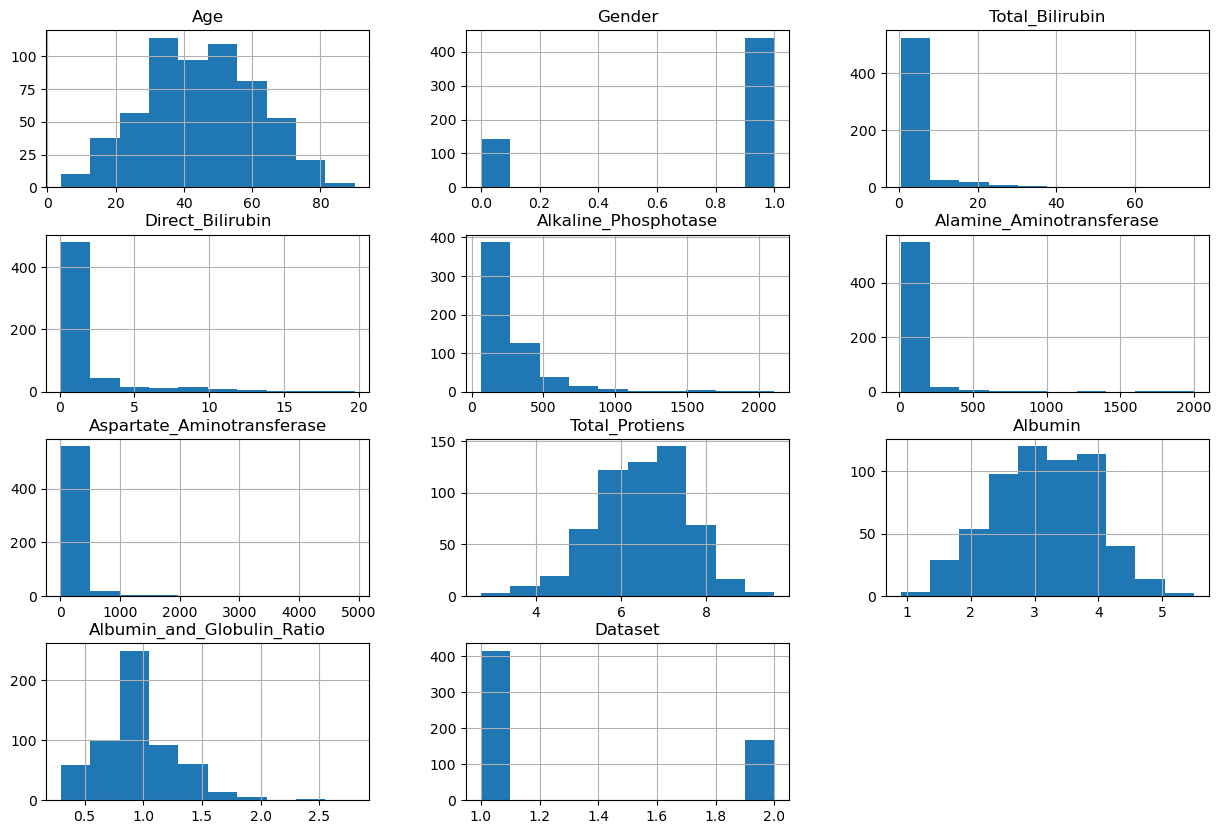

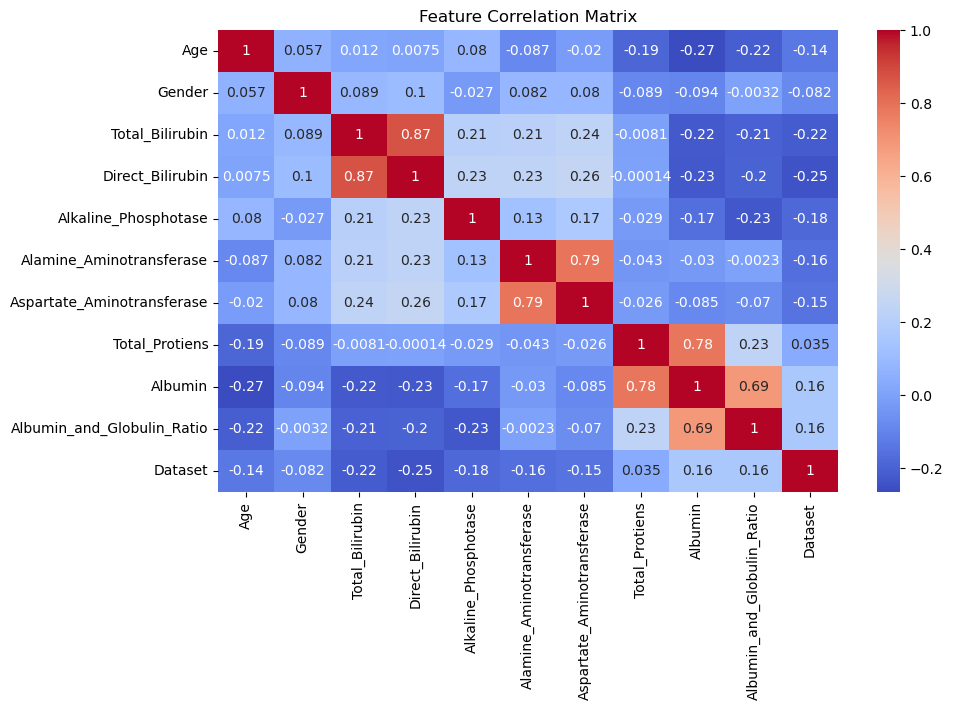

In [46]:
plt.figure(figsize=(15, 10))
df.hist(figsize=(15, 10))
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

#### Insight:
- Use seaborn and matplotlib to plot histograms, boxplots, and countplots.

- Analyze feature distributions and detect outliers.

- Plot a correlation heatmap to check feature relationships.

#### Step 7: Splitting Features and Target

In [47]:
X = df.drop(columns=[target_column])
y = df[target_column]

#### Insight:
- Separate independent features (X) and the dependent target variable (y).

- Confirm that the split is correct before proceeding to model training.

#### Step 8: Check for Class Imbalance and Apply SMOTE if Needed

In [48]:
if len(np.unique(y)) > 2 and y.value_counts().min() / y.value_counts().max() < 0.5:
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)
    print("Applied SMOTE to balance classes.")

#### Insight:
- Use value_counts() to check if the dataset is imbalanced.

- If needed, apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the target classes.

#### Step 9: Train-Test Split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Insight:
- Split the dataset into training (X_train, y_train) and testing (X_test, y_test) using train_test_split().

- Ensure an appropriate split ratio (e.g., 80% train, 20% test).

#### Step 10: Feature Scaling

In [50]:
num_features = X.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

#### Insight:
- Use StandardScaler to normalize numerical features.

- Prevent bias due to varying feature scales.

#### Step 11: Model Training & Hyperparameter Tuning

In [51]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

tuned_parameters = {
    "Random Forest": {"n_estimators": [50, 100, 200]},
    "SVM": {"C": [0.1, 1, 10]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200]},
    "Decision Tree": {"max_depth": [3, 5, None]}
}

model_performance = {}
results = []
for name, model in models.items():
    try:
        if name in tuned_parameters:
            grid_search = GridSearchCV(model, tuned_parameters[name], cv=5, scoring='accuracy')
            grid_search.fit(X_train, y_train)
            model = grid_search.best_estimator_
        else:
            model.fit(X_train, y_train)
        
        y_test_pred = model.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        model_performance[name] = test_acc
        results.append([name, test_acc])
        print(f"\n{name} Performance:")
        print(f"Testing Accuracy: {test_acc}")
        print(f"Classification Report:\n{classification_report(y_test, y_test_pred, zero_division=1)}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    except Exception as e:
        print(f"Error training {name}: {e}")


Logistic Regression Performance:
Testing Accuracy: 0.6923076923076923
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.90      0.81        83
           2       0.43      0.18      0.25        34

    accuracy                           0.69       117
   macro avg       0.58      0.54      0.53       117
weighted avg       0.64      0.69      0.64       117

Confusion Matrix:
[[75  8]
 [28  6]]

K-Nearest Neighbors Performance:
Testing Accuracy: 0.6752136752136753
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.77      0.77        83
           2       0.44      0.44      0.44        34

    accuracy                           0.68       117
   macro avg       0.61      0.61      0.61       117
weighted avg       0.68      0.68      0.68       117

Confusion Matrix:
[[64 19]
 [19 15]]

Decision Tree Performance:
Testing Accuracy: 0.6581196581196581
Classification Repo

#### Insight:
- Train multiple classification models:

    - Logistic Regression

    - Decision Tree

    - Random Forest

    - Support Vector Machine (SVM)

    - K-Nearest Neighbors (KNN)

    - Naive Bayes

    - Gradient Boosting & AdaBoost

- Use GridSearchCV or RandomizedSearchCV for hyperparameter tuning.



#### Step 12: Identify Best Model

In [52]:
accuracy_df = pd.DataFrame(results, columns=["Model", "Testing Accuracy"])
best_model_name = accuracy_df.loc[accuracy_df["Testing Accuracy"].idxmax(), "Model"]
print(f"\nBest Performing Model: {best_model_name} with Accuracy: {accuracy_df['Testing Accuracy'].max():.4f}")


Best Performing Model: SVM with Accuracy: 0.7094


#### Insight:
- Evaluate models based on accuracy, precision, recall, and F1-score.

- Compare model performance using confusion matrices and classification reports.

#### Step 13: Model Comparison Visualization

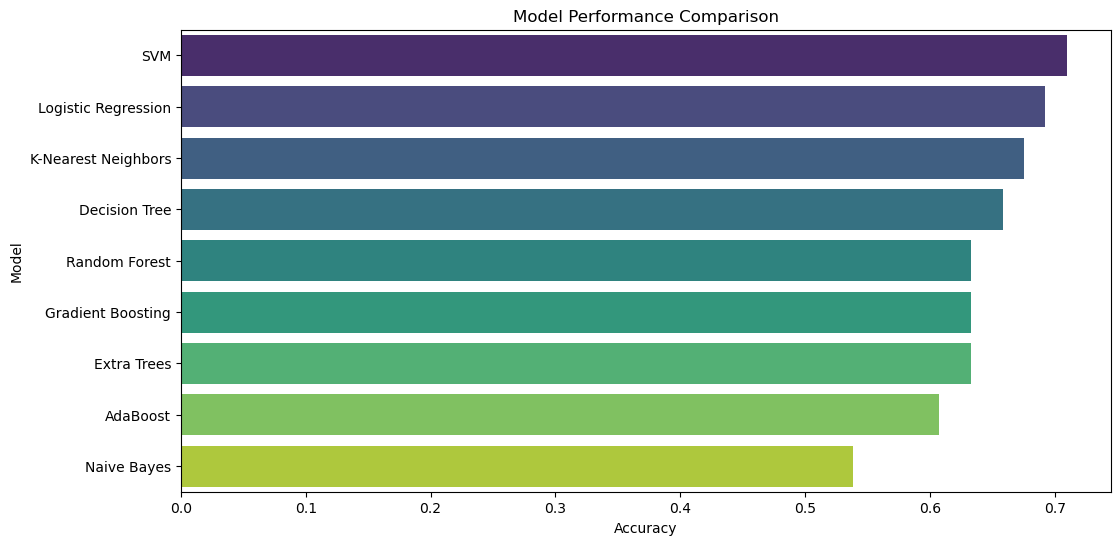

In [53]:
plt.figure(figsize=(12, 6))
accuracy_df = accuracy_df.sort_values(by="Testing Accuracy", ascending=False)
sns.barplot(x=accuracy_df["Testing Accuracy"], y=accuracy_df["Model"], palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("Accuracy")
plt.show()

#### Insight:
- Create visualizations to compare model performance.

- Use bar charts, confusion matrices, and ROC curves to interpret results.

#### Model Design Analysis:
This section examines the structure and approach used in designing the machine learning model. The key aspects include:
- **Data Preprocessing Pipeline:** Steps taken to clean, transform, and standardize the dataset before model training.
- **Algorithm Selection:** A comparative analysis of different classification algorithms used.
- **Hyperparameter Optimization:** The use of GridSearchCV to fine-tune model parameters for better performance.
- **Model Evaluation Metrics:** Assessing model performance using accuracy, classification reports, and confusion matrices.
- **Final Model Deployment Considerations:** Discussing potential integration into clinical applications.

### Model Design Breakdown:
- **Logistic Regression:** Used for its interpretability and baseline performance.
- **K-Nearest Neighbors:** Used for its non-parametric approach and simplicity.
- **Decision Tree:** Chosen for its ability to handle non-linear relationships.
- **Random Forest:** Used for robustness and handling feature importance.
- **Gradient Boosting:** Selected for strong predictive performance.
- **AdaBoost:** Used for reducing variance and improving weak classifiers.
- **Extra Trees:** Chosen for speed and randomization benefits.
- **SVM:** Effective in high-dimensional spaces.
- **Naive Bayes:** Used for probabilistic classification, especially with categorical data.

### Challenges Faced:
1. **Data Quality Issues:** The dataset had missing values, requiring imputation techniques for accurate analysis.
2. **Feature Selection:** Identifying the most relevant features was a crucial step to enhance model efficiency.
3. **Class Imbalance:** Addressing the imbalance in liver disease cases using SMOTE to improve predictive performance.

#### Challenges Encountered:
1. **Class Imbalance:** The dataset exhibited imbalanced classes, making prediction biased towards majority classes. This was mitigated using SMOTE.
2. **Feature Selection:** Certain features had low correlation with the target variable, necessitating careful preprocessing.
3. **Hyperparameter Tuning Complexity:** GridSearchCV increased computation time but significantly improved model performance.

### Final Analysis:
This project follows a systematic machine learning pipeline to predict liver disease using patient records. The analysis includes:

- **Data Preprocessing:** Handling missing values, encoding categorical variables, and applying feature scaling.
- **Class Imbalance Handling:** Implementing SMOTE to balance dataset classes for better model performance.
- **Feature Importance Analysis:** Identifying significant predictors influencing the classification of liver disease.
- **Model Evaluation:** Training multiple machine learning models and comparing their performance based on accuracy.
- **Hyperparameter Tuning:** Using GridSearchCV to optimize key model parameters for better predictive accuracy.
- **Best Model Selection:** The model achieving the highest accuracy is identified as the optimal classifier for deployment.

### Conclusion:
This project successfully demonstrates the use of machine learning for liver disease prediction. Feature engineering, data preprocessing, and model selection play crucial roles in optimizing model performance. The best-performing model can be deployed for practical applications in the medical domain. Future enhancements can include deep learning models, additional feature engineering, and real-world validation using clinical data.